
## 大致介绍

介绍下课程推进的逻辑：

第一章介绍基础概念，用着重分清楚`Reward`,`value function`和`q function`的区别。

第二章介绍MDP，MDP是对环境的一种建模，即state将以一种什么样的方式推进是已知的。重点理解`Bellman Expectation Equation`和`Bellman Optimality Equation`，二者本质上都是递推公式，给动态规划打下基础。

第三章介绍如何处理MDP，分为两步：`planning`和`controlling`。`planning`代表如何评估$v_{\pi}$，`controlling`代表如何根据评估，找到最优的策略$\pi_*$。解决方案包括`policy iteration`和`value iteration`。

第四章介绍环境未知的情况下（model free），如何做planning。有两种方法：`MC（Monte-Carlo）`和`TD（Temporal Difference）`。

第五章介绍环境未知的情况下，如何做`controlling`。又根据实验episode的产生，是不是依据目标policy，引出`On-Policy`和`Off-Policy`两种方法。主要的算法：`On-Policy Sarsa Control`，`Off-Policy Q-learning`。



## Lecture 5 Model Free Control

**On-policy learning vs. Off-policy learning**：
- on代表在任务中学习，从采样的$\pi$中学习$\pi$。(自学)[已知MDP(太复杂),从MDP中抽样学习，得到π，david sliver归纳为learning on the job]
- off代表在某种基础上学习，从采样的$\mu$中学习$\pi$。(有人示范)[未知MDP，通过观察其它agent的行为，得到π，david sliver归纳为look over someone's shoulder]
- 判断on-policy和off-policy的关键在于，选择动作时遵循的策略和更新动作值函数时遵循的策略是否相同

**On-Policy Monte-Carlo Control**：
- 策略评估：Monte-Carlo policy evaluation，$Q≈q_{\pi}$
- 策略改进：$\epsilon$-greedy policy improvement
![](https://github.com/applenob/rl_learn/raw/master/res/mc_policy_iteration.png)


**基于Monte-Carlo的policy iteration方法的问题：**
- 仍然需要MDP，和model free不符
- 但是如果π是一个确定性策略，greedy policy improvement会造成没有exploration(引入epsilon增加探索)


**为什么只能使用Q？**：V的`greedy policy improvement`依赖于MDP，而Q的则不需要。
- 为什么model-free的问题，一般都是计算action-value Q(s,a)而不是state-value V(s)，因为我们的最终目的是找到policy π*，V(s)需要确切的知道状态转移概率才能算出π*，在model-free的情况下，Q(s,a)能够让我们在不知道环境模型的情况下，用Q评估各个状态的各个行为有多好。

**$\epsilon$-greedy policy improvement**：
- $\pi(a|s)=\left\{\textbf{}\begin{matrix}\epsilon/m+1-\epsilon\;\;\;if\;a*=\underset{a\in A}{argmax}Q(s,a)\\ \epsilon/m\;\;\;otherwise\end{matrix}\right.$
- 如果是greedy action，π(a|s)≈1(不探索)，otherwise π(a|s)=ϵ/m(各action均等概率探索)
- 即，有$\epsilon$的可能是随机选择。
- m是state的action数量，1-epsilon的概率选择greedy action

**Greedy in the Limit with Infinite Exploration (GLIE)**：
- 希望上面提到的$\epsilon$是衰减的，即到最后的时候，直接采用贪婪选择。


**KEY1 Sarsa**

**On-Policy Sarsa Control**：
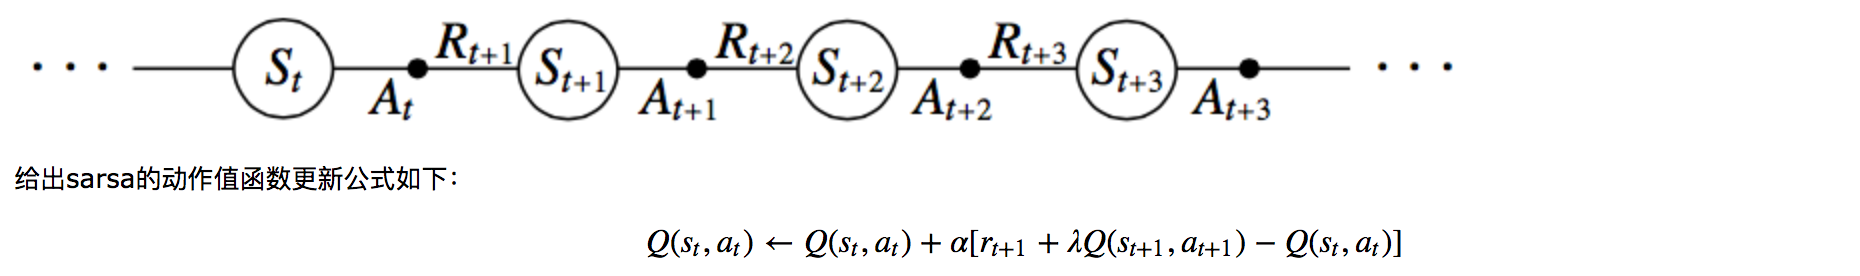
- 所谓sarsa即，1.使用$\epsilon$-greedy，根据$s$，选择$a$；2.获得奖励$r$，和新的状态$s'$；3.再使用$\epsilon$-greedy，选择$a'$；4.更新Q表中的Q(s,a)；5.s<-s',a<-a'(在s'估计的动作a'也是接下来要做的动作)； ... ...直到最终状态终止循环
- 新Q(s,a) = 老Q(s,a) + 学习率*差距；  //  差距 = reward + diff(Q)；  //  diff(Q) = Q(s',a')-Q(s,a)
- 需要注意的是，对于每个非终止的状态st，在到达下个状态st+1后，都可以利用上述公式更新Q(st,At)，而如果st是终止状态，则要令Q(st+1=0,at+1)。由于动作值函数的每次更新都与(st,at,rt+1,st+1,at+1)相关，因此算法被命名为sarsa算法。
![](https://github.com/applenob/rl_learn/raw/master/res/sarsa_2.png)
![](https://github.com/applenob/rl_learn/raw/master/res/sarsa.png)

**n-step Sarsa**：
![](https://github.com/applenob/rl_learn/raw/master/res/n_step_sarsa.png)
- $q_t^{(n)} = R_{t+1} + \gamma R_{t+2} + ... + \gamma ^{n-1} R_{t+n} + \gamma ^{n}Q(S_{t+n})$
- $Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha(q_t^{n}-Q(S_t, A_t))$


**Sarsa Lambda**：
- sarsa lambda相当于 n_step sarsa + 权重衰减(lambda/eligibility trace)
- 在每次take action获得reward后，Sarsa(lambda=0)只对前一步Q(s,a)进行更新，Sarsa(0<lambda<1) 则会对获得reward之前的步进行更新,Sarsa(lambda=1) 则会对获得reward之前的所有步的Q进行更新(有衰减的)。

**Forward View Sarsa($\lambda$)**：
- $q_t^{\lambda}=(1-\lambda)\sum_{n=1}^{\infty}\lambda ^{n-1}q_t^{(n)}$
- $Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha(q_t^{\lambda}-Q(S_t, A_t))$


**Backward View Sarsa($\lambda$)**：
- $E_0(s, a)= 0$
- $E_t(s, a)=\gamma\lambda E_{t-1}(s, a)+\mathbf{1}(S_t=s,A_t=a)$
- $\delta_t = R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)$
- $Q(s, a)\leftarrow Q(s, a)+\alpha\delta_tE_t(s,a)$
- $新Q\leftarrow 老Q+学习率*衰减*差距$
![](https://github.com/applenob/rl_learn/raw/master/res/sarsa_lamda.png)

**Off-Policy Learning**：behaviour policy：$\mu(a|s)$，已知的，可以用来指导的策略。

**Importance Sampling for Off-Policy Monte-Carlo**：
- 按照概率分布，随机的取一些样本点，再 sigma(p(xi)*f(xi))近似这个期望
- 重要性采样（估计期望）：$E_{x\sim P}[f(X)] = \sum P(X)f(X) = \sum Q(x)\frac{P(X)}{Q(X)}f(X) = E_{X\sim Q}[\frac{P(X)}{Q(X)}f(X)]$
- 将来获得奖赏的预期 = 在将来所有能获得的奖赏中选取一部分 = $\sum Q(x)\frac{这部分奖赏}{分配函数值}f(X) = E_{X\sim Q}[\frac{P(X)}{Q(X)}f(X)]$
- $G_t^{\pi/\mu} = \frac{\pi(A_t|S_t)}{\mu(A_t|S_t)} \frac{\pi(A_t|S_t)}{\mu(A_t|S_t)} \frac{\pi(A_{t+1}|S_{t+1})}{\mu(A_T|S_T)}G_t； //在一个蒙特卡洛episode中，每个step都运用重要性采样，对未来进行预估$
- $V(S_t)\leftarrow V(S_t) + \alpha(G_t^{\pi/\mu}-V(S_t))$
- 弊端：重要性采样将方差提高地非常大。

**Q-Learning**：
- off-policy。
- 不需要重要性采样。
- 下一个动作从behaviour policy中选择：$A_{t+1}\sim \mu(\cdot|S_t)$
- 备选的动作从target policy中选择：$A'\sim \pi(\cdot|S_t)$，用于下面式子的计算。
- 更新$Q(S_t, A_t)\leftarrow Q(S_t, A_t)+\alpha(R_{t+1}+\gamma Q(S_{t+1}, A')-Q(S_t, A_t))$
- target policy 是关于$Q(s,a)$的贪婪策略，有$\pi(S_{t+1}) = \underset{a'}{argmax}Q(S_{t+1}, a')$
![](https://github.com/applenob/rl_learn/raw/master/res/q_learning_2.png)
![](https://github.com/applenob/rl_learn/raw/master/res/q-learning.png)

**MDP vs. Model Free**：
![](https://github.com/applenob/rl_learn/raw/master/res/dp_td.png)
![](https://github.com/applenob/rl_learn/raw/master/res/dp_td2.png)
